# Assignment #5 - Jackie Woodlief & Jeff Sharpe

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, Imputer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

/home/shelob/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Big Picture

Based on the past performance of the 2015 flight dataset (from assignment 3), we saw that the non-linear SVM's performed well on the data set; however, that was due in part because we reduced the size of our data set by quite a bit. If the Gaussian RBF with grid search can yield such good results on a small - medium size and complex data set, we can imagine that since neural networks are better at dealing with large, complex data sets, then the performance may even improve. The main reason being is that there will be more data. With such a big, complex data set, a neural network seems like the most appropriate approach.

compare 2 different airlines, maybe

# Get the Data / Info

We are using the flight data set because it is our largest data set, it's massive, with almost 6,000,000 rows and 31 columns. In the past we couldn't use the entire data set because it was too big for our computers to handle efficiently. In addition, we already know that this is a complex data set due to our past assignments involving it and visualizing it.



https://www.kaggle.com/usdot/flight-delays/data

Click on the above link, and download flights.csv, as that is the data set I used for this assignment!

In [2]:
 #Let's read in our data

flights_data = pd.read_csv("flights.csv")

/home/shelob/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_set_throwaway, flights = train_test_split(flights_data, test_size = 0.17, random_state = 42)
del train_set_throwaway # since we don't them, we can go ahead and delete them from the memory!

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989244 entries, 1508570 to 1367429
Data columns (total 31 columns):
YEAR                   989244 non-null int64
MONTH                  989244 non-null int64
DAY                    989244 non-null int64
DAY_OF_WEEK            989244 non-null int64
AIRLINE                989244 non-null object
FLIGHT_NUMBER          989244 non-null int64
TAIL_NUMBER            986799 non-null object
ORIGIN_AIRPORT         989244 non-null object
DESTINATION_AIRPORT    989244 non-null object
SCHEDULED_DEPARTURE    989244 non-null int64
DEPARTURE_TIME         974729 non-null float64
DEPARTURE_DELAY        974729 non-null float64
TAXI_OUT               974222 non-null float64
WHEELS_OFF             974222 non-null float64
SCHEDULED_TIME         989244 non-null float64
ELAPSED_TIME           971487 non-null float64
AIR_TIME               971487 non-null float64
DISTANCE               989244 non-null int64
WHEELS_ON              973616 non-null float64
TAXI_IN

In [5]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,989244.0,989244.000000,989244.000000,989244.000000,989244.000000,989244.00000,974729.000000,974729.000000,974222.000000,974222.000000,...,989244.000000,973616.000000,971487.000000,989244.000000,989244.000000,180586.000000,180586.000000,180586.000000,180586.000000,180586.000000
mean,2015.0,6.521581,15.705901,3.924253,2171.461972,1329.54379,1335.244998,9.376492,16.075074,1357.214071,...,1493.999944,1476.876830,4.422846,0.002609,0.015341,13.449121,0.074607,18.991876,23.515284,2.972323
std,0.0,3.405019,8.783922,1.988866,1756.456337,483.62175,496.297124,37.207911,8.924512,497.906636,...,507.128619,526.259036,39.373835,0.051012,0.122905,27.929466,1.945797,49.031444,42.955290,20.579862
min,2015.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,-47.000000,1.000000,1.000000,...,1.000000,1.000000,-82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,4.000000,8.000000,2.000000,730.000000,917.00000,921.000000,-5.000000,11.000000,935.000000,...,1110.000000,1059.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,7.000000,16.000000,4.000000,1689.000000,1325.00000,1330.000000,-2.000000,14.000000,1343.000000,...,1520.000000,1513.000000,-5.000000,0.000000,0.000000,2.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,9.000000,23.000000,6.000000,3225.000000,1730.00000,1739.000000,7.000000,19.000000,1754.000000,...,1918.000000,1917.000000,8.000000,0.000000,0.000000,18.000000,0.000000,19.000000,29.000000,0.000000
max,2015.0,12.000000,31.000000,7.000000,7438.000000,2359.00000,2400.000000,1670.000000,225.000000,2400.000000,...,2359.000000,2400.000000,1665.000000,1.000000,1.000000,1101.000000,221.000000,1665.000000,1294.000000,937.000000


In [6]:
flights.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1508570,2015,4,7,2,EV,4900,N759EV,FWA,DTW,1340,...,1423.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
363270,2015,1,24,6,AS,611,N413AS,LAS,SEA,1910,...,2133.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3003945,2015,7,8,3,WN,1483,N463WN,OAK,SEA,630,...,812.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2291425,2015,5,26,2,WN,193,N7745A,STL,DAL,810,...,1222.0,152.0,0,0,NaN,0.0,0.0,0.0,152.0,0.0
2973084,2015,7,6,1,UA,253,N213UA,IAH,HNL,1000,...,1316.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Let's make a copy just in case we need to refer back to the original

copy = pd.DataFrame.copy(flights)

In [8]:
# Based on the correlation matrix of airlines, used from a previous run, we determined that these features
# we not very correlated with determining the airline, so we decided to drop these features

copy = copy.drop("CANCELLATION_REASON", 1)
copy = copy.drop("YEAR", 1)
copy = copy.drop("DAY", 1)
copy = copy.drop("MONTH", 1)
copy = copy.drop("DAY_OF_WEEK", 1)
copy = copy.drop("DIVERTED", 1)
copy = copy.drop("CANCELLED", 1)
copy = copy.drop("AIR_SYSTEM_DELAY", 1)
copy = copy.drop("SECURITY_DELAY", 1)
copy = copy.drop("WHEELS_OFF", 1)
copy = copy.drop("SCHEDULED_DEPARTURE", 1)
copy = copy.drop("WEATHER_DELAY", 1)
copy = copy.drop("AIRLINE_DELAY", 1)
copy = copy.drop("WHEELS_ON", 1)
copy = copy.drop("SCHEDULED_ARRIVAL", 1)
copy = copy.drop("ARRIVAL_TIME", 1)
copy = copy.drop("DEPARTURE_TIME", 1)
copy = copy.drop("LATE_AIRCRAFT_DELAY", 1)
copy = copy.drop("ARRIVAL_DELAY", 1)
copy = copy.drop("DEPARTURE_DELAY", 1)

In [9]:
# copy = copy.reset_index(drop = True)

In [10]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989244 entries, 1508570 to 1367429
Data columns (total 11 columns):
AIRLINE                989244 non-null object
FLIGHT_NUMBER          989244 non-null int64
TAIL_NUMBER            986799 non-null object
ORIGIN_AIRPORT         989244 non-null object
DESTINATION_AIRPORT    989244 non-null object
TAXI_OUT               974222 non-null float64
SCHEDULED_TIME         989244 non-null float64
ELAPSED_TIME           971487 non-null float64
AIR_TIME               971487 non-null float64
DISTANCE               989244 non-null int64
TAXI_IN                973616 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 90.6+ MB


In [11]:
encoder = LabelEncoder() #AIRLINE, DESTINATION_AIRPORT, ORIGIN_AIRPORT

In [12]:
airline_cat = copy["AIRLINE"]
destination_cat = copy["DESTINATION_AIRPORT"]
origin_cat = copy["ORIGIN_AIRPORT"]
tail_cat = copy["TAIL_NUMBER"]
flight_cat = copy["FLIGHT_NUMBER"]

In [13]:
destination_cat = destination_cat.apply(str)
origin_cat = origin_cat.apply(str)
flight_cat = flight_cat.apply(str)
tail_cat = tail_cat.apply(str)

In [14]:
# destination_cat = destination_cat.fillna('Other Dest')
# origin_cat = origin_cat.fillna('Other Org')

In [15]:
airline_cat_encoded = encoder.fit_transform(airline_cat)
destination_cat_encoded = encoder.fit_transform(destination_cat)
origin_cat_encoded = encoder.fit_transform(origin_cat)
tail_cat_encoded = encoder.fit_transform(tail_cat)
flight_cat_encoded = encoder.fit_transform(flight_cat)

In [16]:
copy["AIRLINE"]= airline_cat_encoded
copy["DESTINATION_AIRPORT"] = destination_cat_encoded
copy["ORIGIN_AIRPORT"] = origin_cat_encoded
copy["FLIGHT_NUMBER"] = flight_cat_encoded
copy["TAIL_NUMBER"] = tail_cat_encoded

In [17]:
copy.head(3)

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
1508570,4,4333,3386,422,396,13.0,56.0,48.0,30.0,128,5.0
363270,1,5669,1627,478,580,14.0,155.0,155.0,131.0,867,10.0
3003945,13,537,1788,526,580,8.0,110.0,106.0,92.0,672,6.0


In [18]:
imputer = Imputer(strategy = "median")

In [19]:
imputer.fit(copy)
X = imputer.transform(copy)
transform_copy = pd.DataFrame(X, columns = copy.columns)
transform_copy

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
0,4.0,4333.0,3386.0,422.0,396.0,13.0,56.0,48.0,30.0,128.0,5.0
1,1.0,5669.0,1627.0,478.0,580.0,14.0,155.0,155.0,131.0,867.0,10.0
2,13.0,537.0,1788.0,526.0,580.0,8.0,110.0,106.0,92.0,672.0,6.0
3,13.0,1033.0,3525.0,598.0,384.0,6.0,100.0,99.0,85.0,546.0,8.0
4,10.0,1700.0,582.0,455.0,444.0,16.0,498.0,488.0,461.0,3904.0,11.0
5,3.0,424.0,4787.0,450.0,323.0,13.0,70.0,49.0,28.0,151.0,8.0
6,10.0,510.0,714.0,455.0,606.0,13.0,137.0,120.0,100.0,787.0,7.0
7,1.0,6157.0,2090.0,581.0,542.0,11.0,171.0,163.0,145.0,1107.0,7.0
8,0.0,0.0,3667.0,470.0,479.0,34.0,385.0,381.0,341.0,2475.0,6.0
9,5.0,6383.0,567.0,251.0,80.0,9.0,249.0,222.0,204.0,1607.0,9.0


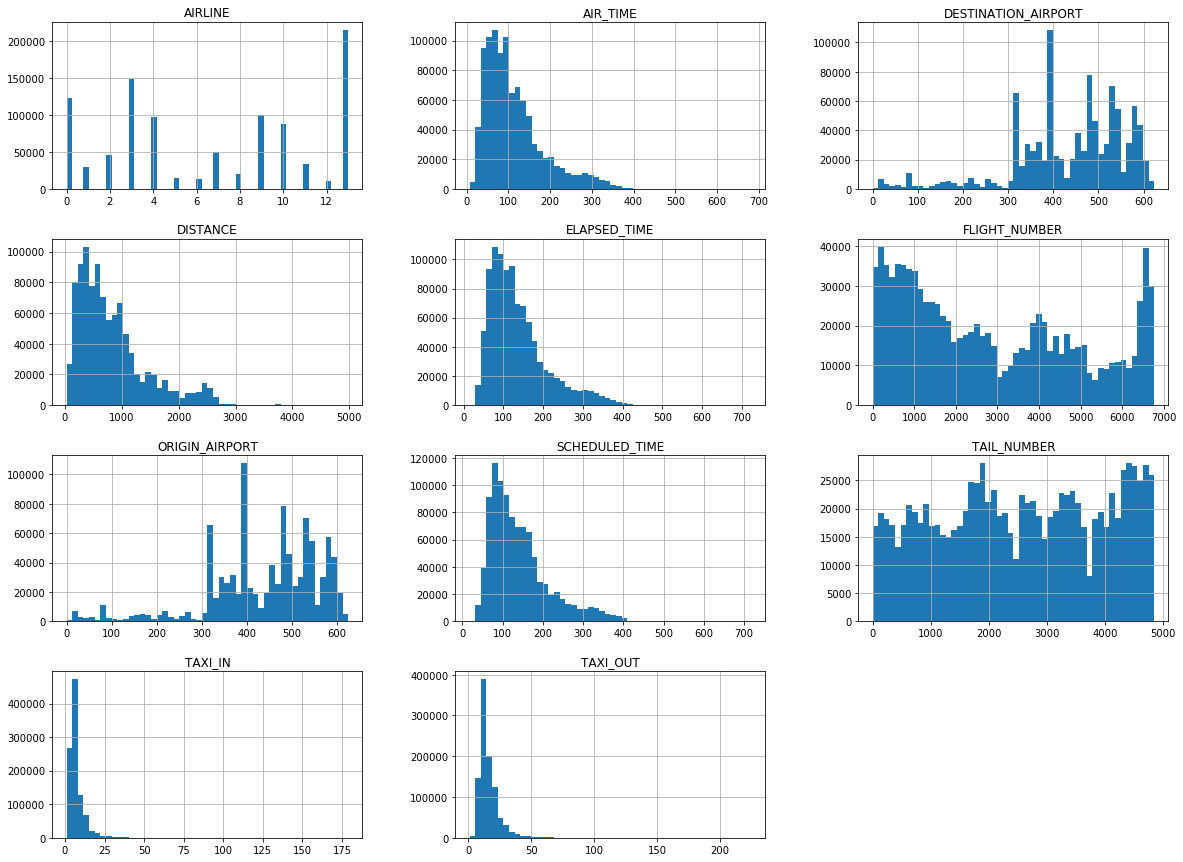

In [20]:
%matplotlib inline
transform_copy.hist(bins = 50, figsize = (20, 15))
plt.show()

In [21]:
correlation_matrix = transform_copy.corr()

In [22]:
correlation_matrix["AIRLINE"].sort_values(ascending = False)

AIRLINE                1.000000
FLIGHT_NUMBER          0.111047
TAIL_NUMBER            0.095959
ORIGIN_AIRPORT         0.076239
DESTINATION_AIRPORT    0.074975
TAXI_IN               -0.079668
DISTANCE              -0.082375
AIR_TIME              -0.086422
SCHEDULED_TIME        -0.105774
ELAPSED_TIME          -0.110566
TAXI_OUT              -0.170568
Name: AIRLINE, dtype: float64

In [23]:
train_set, test_set = train_test_split(transform_copy, test_size = 0.2, random_state = 42)

In [24]:
train_set.head(3)

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
882994,3.0,6402.0,1128.0,480.0,520.0,15.0,221.0,217.0,198.0,1670.0,4.0
249778,9.0,5083.0,3688.0,326.0,454.0,15.0,52.0,55.0,34.0,140.0,6.0
30609,12.0,6565.0,4007.0,582.0,539.0,11.0,100.0,94.0,81.0,550.0,2.0


In [25]:
test_set.head(3)

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
686489,13.0,3910.0,1668.0,526.0,495.0,8.0,200.0,206.0,193.0,1489.0,5.0
585468,0.0,2689.0,1390.0,263.0,214.0,17.0,255.0,245.0,210.0,1846.0,18.0
705282,9.0,4618.0,3148.0,455.0,331.0,16.0,227.0,208.0,187.0,1428.0,5.0


In [26]:
# Now we need to split up into test and train sets based on the airline (multi-class)

y_train = train_set["AIRLINE"]
y_test = test_set["AIRLINE"]
x_test = test_set.drop("AIRLINE", 1)
x_train = train_set.drop("AIRLINE", 1)


# We need to convert to float32 due to a warning we get when we do the dnn_clf
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')

In [27]:
y_train.head(2)

882994    3.0
249778    9.0
Name: AIRLINE, dtype: float32

In [28]:
x_train.head(2)

,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
882994,6402.0,1128.0,480.0,520.0,15.0,221.0,217.0,198.0,1670.0,4.0
249778,5083.0,3688.0,326.0,454.0,15.0,52.0,55.0,34.0,140.0,6.0


# Large-Scale Visualization

Below we will be visualizing different aspects of our data to demonstrate that it is in fact a complex data set!

In [29]:
# Before we do anything, in order to feed the various clf's our labels, we must first convert them from
# float to integers

y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [30]:
# x_train_ds = x_train.values
# x_test_ds = x_test.values

# Construction and Execution Phases

Using the built-in DNNClassifier(), the construction and execution phases are handled already.

## Fully connected network with 2 hidden layers

This is the neural network that we start with!

Also, just to note, since we don't specify here, the activation function being used is the relu (default)!

### Observations

First, we wanted to point out that we have the step size set to 50,000; however, the higher it is, the better performance it seems to get. We tested it at 100,000 and saw ~58% accuracy instead of ~53% at 50,000 steps (once at 50,000 steps we saw ~55% accuracy). We didn't test above 100,000 steps. The reason that we left it at 50,000 is so that it will execute faster. so 53-58% may not sound very accurate, but when you consider that we have 14 different airlines and that if you predicted only one of the fourteen for the test set, you would expect to see around a 7.14% accuracy (it depends on the distribution, this assumes that every airline is equally represented in the data set.) 

In [31]:
x_train.shape

(791395, 10)

In [32]:
# Since there are 14 different airlines, we need to change n_classes to 14, default seems to be 10
# NOTE: This will take a few minutes!!
# ALSO: The more steps you add, the better the accuracy is, however, we are going to put steps at 50,000
# so that it will not be an unreasonably long wait time!
# Steps = 100,000 equals 58% accuracy

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(x_train)
dnn_clf_hidden = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, feature_columns = feature_cols)
dnn_clf_hidden = tf.contrib.learn.SKCompat(dnn_clf_hidden)
dnn_clf_hidden.fit(x_train, y_train_int, batch_size = 50, steps = 50000) 
# 10,000 (46%); 15,000 (47%), 40,000 (50%); 50,000 (53%); 100,000 (58%)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f10d88bffd0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpuu883up2'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpuu883up2/model.ckpt.
INFO:tensorflow:loss = 510.09464, step = 1
INFO:tensorflow:global_step/sec: 80.0401
INFO:tensorflow:loss = 2.370515, step = 101 (1.253 sec)
INFO:tensorflow:global_step/sec: 88.8324
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 89.0602
INFO:tensorflow:loss = 1.7012343, step = 7301 (1.122 sec)
INFO:tensorflow:global_step/sec: 87.3516
INFO:tensorflow:loss = 1.1237347, step = 7401 (1.145 sec)
INFO:tensorflow:global_step/sec: 86.7906
INFO:tensorflow:loss = 1.4038469, step = 7501 (1.154 sec)
INFO:tensorflow:global_step/sec: 88.0414
INFO:tensorflow:loss = 1.7449917, step = 7601 (1.135 sec)
INFO:tensorflow:global_step/sec: 89.5707
INFO:tensorflow:loss = 1.5824227, step = 7701 (1.116 sec)
INFO:tensorflow:global_step/sec: 87.7541
INFO:tensorflow:loss = 1.6217841, step = 7801 (1.140 sec)
INFO:tensorflow:global_step/sec: 87.8918
INFO:tensorflow:loss = 1.8233573, step = 7901 (1.139 sec)
INFO:tensorflow:global_step/sec: 88.3558
INFO:tensorflow:loss = 1.6442752, step = 8001 (1.131 sec)
INFO:tensorflow:global_step/sec: 86.0619
INFO:tensorflow:loss = 1.6252849, step = 8101 (1.162 sec)
INFO:tensorflow:global_step/sec: 85.7262
INFO:tensorflow:loss = 1.7472203, step = 8201 (1.166 sec)
INFO:tenso

INFO:tensorflow:loss = 1.4150624, step = 15501 (1.277 sec)
INFO:tensorflow:global_step/sec: 84.7956
INFO:tensorflow:loss = 1.5296603, step = 15601 (1.181 sec)
INFO:tensorflow:global_step/sec: 83.2597
INFO:tensorflow:loss = 1.3666675, step = 15701 (1.201 sec)
INFO:tensorflow:global_step/sec: 85.931
INFO:tensorflow:loss = 1.4200101, step = 15801 (1.164 sec)
INFO:tensorflow:global_step/sec: 82.954
INFO:tensorflow:loss = 1.5159305, step = 15901 (1.205 sec)
INFO:tensorflow:global_step/sec: 85.4443
INFO:tensorflow:loss = 1.4077917, step = 16001 (1.172 sec)
INFO:tensorflow:global_step/sec: 86.5603
INFO:tensorflow:loss = 1.5593598, step = 16101 (1.154 sec)
INFO:tensorflow:global_step/sec: 87.4127
INFO:tensorflow:loss = 1.414445, step = 16201 (1.144 sec)
INFO:tensorflow:global_step/sec: 87.944
INFO:tensorflow:loss = 1.392242, step = 16301 (1.137 sec)
INFO:tensorflow:global_step/sec: 87.2247
INFO:tensorflow:loss = 1.3555752, step = 16401 (1.146 sec)
INFO:tensorflow:global_step/sec: 87.3613
INFO:

INFO:tensorflow:global_step/sec: 86.7579
INFO:tensorflow:loss = 1.4800622, step = 23801 (1.151 sec)
INFO:tensorflow:global_step/sec: 86.4737
INFO:tensorflow:loss = 1.3601466, step = 23901 (1.157 sec)
INFO:tensorflow:global_step/sec: 84.7991
INFO:tensorflow:loss = 1.3308055, step = 24001 (1.180 sec)
INFO:tensorflow:global_step/sec: 89.1231
INFO:tensorflow:loss = 1.4109372, step = 24101 (1.122 sec)
INFO:tensorflow:global_step/sec: 88.3922
INFO:tensorflow:loss = 1.4516696, step = 24201 (1.132 sec)
INFO:tensorflow:global_step/sec: 87.5773
INFO:tensorflow:loss = 1.3915744, step = 24301 (1.141 sec)
INFO:tensorflow:global_step/sec: 87.7346
INFO:tensorflow:loss = 1.1350384, step = 24401 (1.139 sec)
INFO:tensorflow:global_step/sec: 86.86
INFO:tensorflow:loss = 1.4092615, step = 24501 (1.150 sec)
INFO:tensorflow:global_step/sec: 88.9571
INFO:tensorflow:loss = 1.2742646, step = 24601 (1.125 sec)
INFO:tensorflow:global_step/sec: 87.6246
INFO:tensorflow:loss = 1.4229026, step = 24701 (1.143 sec)
IN

INFO:tensorflow:loss = 1.5169189, step = 32001 (1.136 sec)
INFO:tensorflow:global_step/sec: 87.3463
INFO:tensorflow:loss = 1.6733114, step = 32101 (1.147 sec)
INFO:tensorflow:global_step/sec: 87.2111
INFO:tensorflow:loss = 1.5278844, step = 32201 (1.145 sec)
INFO:tensorflow:global_step/sec: 88.4699
INFO:tensorflow:loss = 0.8922517, step = 32301 (1.130 sec)
INFO:tensorflow:global_step/sec: 87.6223
INFO:tensorflow:loss = 1.2440039, step = 32401 (1.141 sec)
INFO:tensorflow:global_step/sec: 87.0288
INFO:tensorflow:loss = 1.3418763, step = 32501 (1.148 sec)
INFO:tensorflow:global_step/sec: 84.5362
INFO:tensorflow:loss = 1.367166, step = 32601 (1.185 sec)
INFO:tensorflow:global_step/sec: 85.3781
INFO:tensorflow:loss = 1.3949614, step = 32701 (1.169 sec)
INFO:tensorflow:global_step/sec: 86.0812
INFO:tensorflow:loss = 1.5202876, step = 32801 (1.164 sec)
INFO:tensorflow:global_step/sec: 85.3209
INFO:tensorflow:loss = 1.5778422, step = 32901 (1.170 sec)
INFO:tensorflow:global_step/sec: 86.0741
I

INFO:tensorflow:global_step/sec: 88.5974
INFO:tensorflow:loss = 1.2745491, step = 40301 (1.129 sec)
INFO:tensorflow:global_step/sec: 89.9438
INFO:tensorflow:loss = 1.2043118, step = 40401 (1.111 sec)
INFO:tensorflow:global_step/sec: 87.4273
INFO:tensorflow:loss = 1.3075955, step = 40501 (1.145 sec)
INFO:tensorflow:global_step/sec: 88.5862
INFO:tensorflow:loss = 1.4052672, step = 40601 (1.129 sec)
INFO:tensorflow:global_step/sec: 86.3208
INFO:tensorflow:loss = 1.1748669, step = 40701 (1.157 sec)
INFO:tensorflow:global_step/sec: 88.4994
INFO:tensorflow:loss = 1.1295958, step = 40801 (1.130 sec)
INFO:tensorflow:global_step/sec: 83.3459
INFO:tensorflow:loss = 1.393655, step = 40901 (1.205 sec)
INFO:tensorflow:global_step/sec: 73.7094
INFO:tensorflow:loss = 1.263694, step = 41001 (1.351 sec)
INFO:tensorflow:global_step/sec: 85.1353
INFO:tensorflow:loss = 1.1950207, step = 41101 (1.175 sec)
INFO:tensorflow:global_step/sec: 83.9127
INFO:tensorflow:loss = 1.3398799, step = 41201 (1.193 sec)
IN

INFO:tensorflow:loss = 1.3613309, step = 48501 (1.133 sec)
INFO:tensorflow:global_step/sec: 88.6625
INFO:tensorflow:loss = 1.0206101, step = 48601 (1.129 sec)
INFO:tensorflow:global_step/sec: 87.022
INFO:tensorflow:loss = 1.1157827, step = 48701 (1.148 sec)
INFO:tensorflow:global_step/sec: 86.4559
INFO:tensorflow:loss = 1.2094702, step = 48801 (1.157 sec)
INFO:tensorflow:global_step/sec: 87.9499
INFO:tensorflow:loss = 1.2086653, step = 48901 (1.136 sec)
INFO:tensorflow:global_step/sec: 87.9261
INFO:tensorflow:loss = 1.3725052, step = 49001 (1.138 sec)
INFO:tensorflow:global_step/sec: 89.2094
INFO:tensorflow:loss = 1.3114045, step = 49101 (1.121 sec)
INFO:tensorflow:global_step/sec: 87.1909
INFO:tensorflow:loss = 1.1113037, step = 49201 (1.147 sec)
INFO:tensorflow:global_step/sec: 88.8565
INFO:tensorflow:loss = 1.4320076, step = 49301 (1.125 sec)
INFO:tensorflow:global_step/sec: 87.0608
INFO:tensorflow:loss = 1.0943191, step = 49401 (1.149 sec)
INFO:tensorflow:global_step/sec: 79.8121
I

SKCompat()

In [33]:
# This is the class accuracy score

y_predict_hidden = dnn_clf_hidden.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmpuu883up2/model.ckpt-50000


0.5526032479315033

In [34]:
y_predict_hidden_test = dnn_clf_hidden.predict(x_test)

c = tf.confusion_matrix(y_test_int, y_predict_hidden_test['classes'])

with tf.Session():
    print('Confusion Matrix: \n\n', tf.Tensor.eval(c,feed_dict=None, session=None))

INFO:tensorflow:Restoring parameters from /tmp/tmpuu883up2/model.ckpt-50000
Confusion Matrix: 

 [[12120   177   559  3389   540    14    49   346   196   950  1709  1278
      6  3409]
 [  325  1743   133   155   164     0    20   133   287   778   591    82
      8  1448]
 [  764   264  1278  1610   423    79     2   123   498   449  1287   283
     20  1977]
 [ 1553    97   491 20214   375    10    32   202   197   926  2145   228
     13  3095]
 [   14    15    41   626 14078     5     0   324     4  3171    56    15
      0   921]
 [   40     0    24   862   159   452     0    33     0   366   167    25
      0   847]
 [   34    12    19    94    43     0  2014     6     0    34   139     0
      0   197]
 [  210    37     3    65   136     0    18  7391     0   239    15     0
      0  1936]
 [  267   178   265   219    53     0     2   118  1025   337   197    74
     30  1310]
 [  120    42    89   380  3373     4    76   309   104 13543   114    16
      1  2135]
 [ 2104   607

# Testing out some Activation Functions

Our fully connected network with 2 hidden layers didn't perform to well, so let's experiment with some activation functions!

The first alternate activation function that we will try is the sigmoid, after than we will try the tanh; in both cases the accuracy decreased from the default relu function.

In [35]:
dnn_clf_sig = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, activation_fn="sigmoid", feature_columns = feature_cols)
dnn_clf_sig = tf.contrib.learn.SKCompat(dnn_clf_sig)
dnn_clf_sig.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 steps

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f10d9a76fd0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp3zhktkbr'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp3zhktkbr/model.ckpt.
INFO:tensorflow:loss = 2.8013306, step = 1
INFO:tensorflow:global_step/sec: 85.4496
INFO:tensorflow:loss = 2.1432102, step = 101 (1.173 sec)
INFO:tensorflow:global_step/sec: 87.7944
INFO:tensorflow:loss

INFO:tensorflow:global_step/sec: 87.6597
INFO:tensorflow:loss = 1.3565379, step = 7401 (1.142 sec)
INFO:tensorflow:global_step/sec: 87.8175
INFO:tensorflow:loss = 1.5700827, step = 7501 (1.138 sec)
INFO:tensorflow:global_step/sec: 89.2442
INFO:tensorflow:loss = 1.6407967, step = 7601 (1.121 sec)
INFO:tensorflow:global_step/sec: 87.9885
INFO:tensorflow:loss = 1.7230399, step = 7701 (1.140 sec)
INFO:tensorflow:global_step/sec: 89.0673
INFO:tensorflow:loss = 1.671807, step = 7801 (1.119 sec)
INFO:tensorflow:global_step/sec: 88.3571
INFO:tensorflow:loss = 1.8567023, step = 7901 (1.132 sec)
INFO:tensorflow:global_step/sec: 87.6948
INFO:tensorflow:loss = 1.9299653, step = 8001 (1.148 sec)
INFO:tensorflow:global_step/sec: 84.8489
INFO:tensorflow:loss = 1.8064729, step = 8101 (1.171 sec)
INFO:tensorflow:global_step/sec: 86.9459
INFO:tensorflow:loss = 1.9143466, step = 8201 (1.150 sec)
INFO:tensorflow:global_step/sec: 79.8777
INFO:tensorflow:loss = 1.583066, step = 8301 (1.253 sec)
INFO:tensorf

INFO:tensorflow:loss = 1.7347822, step = 15601 (1.106 sec)
INFO:tensorflow:global_step/sec: 88.3163
INFO:tensorflow:loss = 1.526116, step = 15701 (1.133 sec)
INFO:tensorflow:global_step/sec: 77.6105
INFO:tensorflow:loss = 1.621875, step = 15801 (1.290 sec)
INFO:tensorflow:global_step/sec: 64.9608
INFO:tensorflow:loss = 1.4700214, step = 15901 (1.542 sec)
INFO:tensorflow:global_step/sec: 75.264
INFO:tensorflow:loss = 1.5925199, step = 16001 (1.325 sec)
INFO:tensorflow:global_step/sec: 81.5701
INFO:tensorflow:loss = 1.6544771, step = 16101 (1.226 sec)
INFO:tensorflow:global_step/sec: 83.8345
INFO:tensorflow:loss = 1.596833, step = 16201 (1.194 sec)
INFO:tensorflow:global_step/sec: 84.1296
INFO:tensorflow:loss = 1.5641841, step = 16301 (1.188 sec)
INFO:tensorflow:global_step/sec: 84.833
INFO:tensorflow:loss = 1.5195621, step = 16401 (1.179 sec)
INFO:tensorflow:global_step/sec: 84.8942
INFO:tensorflow:loss = 1.4987798, step = 16501 (1.178 sec)
INFO:tensorflow:global_step/sec: 90.6316
INFO:

INFO:tensorflow:global_step/sec: 74.0003
INFO:tensorflow:loss = 1.3284132, step = 23901 (1.350 sec)
INFO:tensorflow:global_step/sec: 67.0234
INFO:tensorflow:loss = 1.5129402, step = 24001 (1.492 sec)
INFO:tensorflow:global_step/sec: 68.3875
INFO:tensorflow:loss = 1.5630146, step = 24101 (1.471 sec)
INFO:tensorflow:global_step/sec: 55.7254
INFO:tensorflow:loss = 1.5278561, step = 24201 (1.787 sec)
INFO:tensorflow:global_step/sec: 64.0936
INFO:tensorflow:loss = 1.5703927, step = 24301 (1.561 sec)
INFO:tensorflow:global_step/sec: 59.3319
INFO:tensorflow:loss = 1.5045987, step = 24401 (1.684 sec)
INFO:tensorflow:global_step/sec: 86.9272
INFO:tensorflow:loss = 1.7056767, step = 24501 (1.150 sec)
INFO:tensorflow:global_step/sec: 84.9227
INFO:tensorflow:loss = 1.4544638, step = 24601 (1.180 sec)
INFO:tensorflow:global_step/sec: 81.3516
INFO:tensorflow:loss = 1.634294, step = 24701 (1.234 sec)
INFO:tensorflow:global_step/sec: 83.3141
INFO:tensorflow:loss = 1.496544, step = 24801 (1.194 sec)
IN

INFO:tensorflow:loss = 1.7667204, step = 32101 (1.009 sec)
INFO:tensorflow:global_step/sec: 85.2083
INFO:tensorflow:loss = 1.536967, step = 32201 (1.173 sec)
INFO:tensorflow:global_step/sec: 82.139
INFO:tensorflow:loss = 1.2367618, step = 32301 (1.219 sec)
INFO:tensorflow:global_step/sec: 86.0104
INFO:tensorflow:loss = 1.3440267, step = 32401 (1.162 sec)
INFO:tensorflow:global_step/sec: 86.008
INFO:tensorflow:loss = 1.7172073, step = 32501 (1.164 sec)
INFO:tensorflow:global_step/sec: 88.4858
INFO:tensorflow:loss = 1.4356296, step = 32601 (1.130 sec)
INFO:tensorflow:global_step/sec: 87.0898
INFO:tensorflow:loss = 1.5889761, step = 32701 (1.148 sec)
INFO:tensorflow:global_step/sec: 86.109
INFO:tensorflow:loss = 1.7109894, step = 32801 (1.160 sec)
INFO:tensorflow:global_step/sec: 85.284
INFO:tensorflow:loss = 1.5816617, step = 32901 (1.173 sec)
INFO:tensorflow:global_step/sec: 84.637
INFO:tensorflow:loss = 1.5559907, step = 33001 (1.182 sec)
INFO:tensorflow:global_step/sec: 84.6685
INFO:t

INFO:tensorflow:global_step/sec: 86.9167
INFO:tensorflow:loss = 1.3957772, step = 40401 (1.152 sec)
INFO:tensorflow:global_step/sec: 86.0665
INFO:tensorflow:loss = 1.3653368, step = 40501 (1.162 sec)
INFO:tensorflow:global_step/sec: 88.0455
INFO:tensorflow:loss = 1.3989376, step = 40601 (1.134 sec)
INFO:tensorflow:global_step/sec: 86.7986
INFO:tensorflow:loss = 1.4489167, step = 40701 (1.152 sec)
INFO:tensorflow:global_step/sec: 85.9711
INFO:tensorflow:loss = 1.2707046, step = 40801 (1.165 sec)
INFO:tensorflow:global_step/sec: 86.8612
INFO:tensorflow:loss = 1.5054665, step = 40901 (1.151 sec)
INFO:tensorflow:global_step/sec: 85.1865
INFO:tensorflow:loss = 1.2536352, step = 41001 (1.173 sec)
INFO:tensorflow:global_step/sec: 85.9327
INFO:tensorflow:loss = 1.5007373, step = 41101 (1.165 sec)
INFO:tensorflow:global_step/sec: 83.1456
INFO:tensorflow:loss = 1.4240834, step = 41201 (1.202 sec)
INFO:tensorflow:global_step/sec: 82.6217
INFO:tensorflow:loss = 1.6036454, step = 41301 (1.211 sec)


INFO:tensorflow:loss = 1.244383, step = 48601 (1.245 sec)
INFO:tensorflow:global_step/sec: 81.4121
INFO:tensorflow:loss = 1.2975838, step = 48701 (1.229 sec)
INFO:tensorflow:global_step/sec: 71.1148
INFO:tensorflow:loss = 1.3183545, step = 48801 (1.415 sec)
INFO:tensorflow:global_step/sec: 67.005
INFO:tensorflow:loss = 1.4712237, step = 48901 (1.483 sec)
INFO:tensorflow:global_step/sec: 60.7465
INFO:tensorflow:loss = 1.2577612, step = 49001 (1.653 sec)
INFO:tensorflow:global_step/sec: 58.3419
INFO:tensorflow:loss = 1.4708526, step = 49101 (1.713 sec)
INFO:tensorflow:global_step/sec: 62.2344
INFO:tensorflow:loss = 1.2341942, step = 49201 (1.604 sec)
INFO:tensorflow:Saving checkpoints for 49271 into /tmp/tmp3zhktkbr/model.ckpt.
INFO:tensorflow:global_step/sec: 50.8517
INFO:tensorflow:loss = 1.4291768, step = 49301 (1.964 sec)
INFO:tensorflow:global_step/sec: 60.0386
INFO:tensorflow:loss = 1.2857175, step = 49401 (1.669 sec)
INFO:tensorflow:global_step/sec: 58.9791
INFO:tensorflow:loss = 

SKCompat()

In [36]:
y_predict_sig = dnn_clf_sig.predict(x_test)
accuracy_score(y_test_int, y_predict_sig['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmp3zhktkbr/model.ckpt-50000


0.489494513492613

## Now let's try out tanh activation function

In [37]:
dnn_clf_tanh = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, activation_fn="tanh", feature_columns = feature_cols)
dnn_clf_tanh = tf.contrib.learn.SKCompat(dnn_clf_tanh)
dnn_clf_tanh.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 steps

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f10d99f5b00>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpouw4u3ru'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpouw4u3ru/model.ckpt.
INFO:tensorflow:loss = 3.0396652, step = 1
INFO:tensorflow:global_step/sec: 57.4867
INFO:tensorflow:loss = 2.1289222, step = 101 (1.743 sec)
INFO:tensorflow:global_step/sec: 67.9199
INFO:tensorflow:loss

INFO:tensorflow:global_step/sec: 80.6494
INFO:tensorflow:loss = 1.3021064, step = 7401 (1.237 sec)
INFO:tensorflow:global_step/sec: 75.7605
INFO:tensorflow:loss = 1.43886, step = 7501 (1.320 sec)
INFO:tensorflow:global_step/sec: 79.1923
INFO:tensorflow:loss = 1.5612655, step = 7601 (1.265 sec)
INFO:tensorflow:global_step/sec: 69.6563
INFO:tensorflow:loss = 1.6067091, step = 7701 (1.434 sec)
INFO:tensorflow:global_step/sec: 71.2336
INFO:tensorflow:loss = 1.5854928, step = 7801 (1.402 sec)
INFO:tensorflow:global_step/sec: 78.9528
INFO:tensorflow:loss = 1.6391411, step = 7901 (1.267 sec)
INFO:tensorflow:global_step/sec: 80.1921
INFO:tensorflow:loss = 1.7841234, step = 8001 (1.246 sec)
INFO:tensorflow:global_step/sec: 82.3875
INFO:tensorflow:loss = 1.6939279, step = 8101 (1.214 sec)
INFO:tensorflow:global_step/sec: 85.3491
INFO:tensorflow:loss = 1.8953966, step = 8201 (1.172 sec)
INFO:tensorflow:global_step/sec: 75.9103
INFO:tensorflow:loss = 1.5872318, step = 8301 (1.318 sec)
INFO:tensorf

INFO:tensorflow:loss = 1.6320393, step = 15601 (1.107 sec)
INFO:tensorflow:global_step/sec: 88.6751
INFO:tensorflow:loss = 1.4598289, step = 15701 (1.129 sec)
INFO:tensorflow:global_step/sec: 86.8713
INFO:tensorflow:loss = 1.6271647, step = 15801 (1.150 sec)
INFO:tensorflow:global_step/sec: 82.1343
INFO:tensorflow:loss = 1.5152559, step = 15901 (1.217 sec)
INFO:tensorflow:global_step/sec: 90.3306
INFO:tensorflow:loss = 1.5598209, step = 16001 (1.108 sec)
INFO:tensorflow:global_step/sec: 86.1947
INFO:tensorflow:loss = 1.5756947, step = 16101 (1.160 sec)
INFO:tensorflow:global_step/sec: 85.7684
INFO:tensorflow:loss = 1.5083803, step = 16201 (1.165 sec)
INFO:tensorflow:global_step/sec: 86.6004
INFO:tensorflow:loss = 1.4622006, step = 16301 (1.156 sec)
INFO:tensorflow:global_step/sec: 87.2724
INFO:tensorflow:loss = 1.4945151, step = 16401 (1.145 sec)
INFO:tensorflow:global_step/sec: 91.5688
INFO:tensorflow:loss = 1.4725959, step = 16501 (1.093 sec)
INFO:tensorflow:global_step/sec: 88.7369


INFO:tensorflow:global_step/sec: 79.7976
INFO:tensorflow:loss = 1.3301533, step = 23901 (1.253 sec)
INFO:tensorflow:global_step/sec: 87.1501
INFO:tensorflow:loss = 1.494885, step = 24001 (1.147 sec)
INFO:tensorflow:global_step/sec: 86.1562
INFO:tensorflow:loss = 1.5950999, step = 24101 (1.162 sec)
INFO:tensorflow:global_step/sec: 85.4735
INFO:tensorflow:loss = 1.5774388, step = 24201 (1.169 sec)
INFO:tensorflow:global_step/sec: 84.5443
INFO:tensorflow:loss = 1.6382924, step = 24301 (1.184 sec)
INFO:tensorflow:global_step/sec: 81.4173
INFO:tensorflow:loss = 1.4510921, step = 24401 (1.227 sec)
INFO:tensorflow:global_step/sec: 79.1299
INFO:tensorflow:loss = 1.6394217, step = 24501 (1.264 sec)
INFO:tensorflow:global_step/sec: 78.2561
INFO:tensorflow:loss = 1.330448, step = 24601 (1.277 sec)
INFO:tensorflow:global_step/sec: 86.7791
INFO:tensorflow:loss = 1.6121664, step = 24701 (1.153 sec)
INFO:tensorflow:global_step/sec: 83.3256
INFO:tensorflow:loss = 1.5578299, step = 24801 (1.199 sec)
IN

INFO:tensorflow:loss = 1.8439064, step = 32101 (1.163 sec)
INFO:tensorflow:global_step/sec: 85.9085
INFO:tensorflow:loss = 1.5849777, step = 32201 (1.163 sec)
INFO:tensorflow:global_step/sec: 91.4132
INFO:tensorflow:loss = 1.2429079, step = 32301 (1.095 sec)
INFO:tensorflow:global_step/sec: 88.5913
INFO:tensorflow:loss = 1.4196249, step = 32401 (1.128 sec)
INFO:tensorflow:global_step/sec: 84.8784
INFO:tensorflow:loss = 1.4960159, step = 32501 (1.178 sec)
INFO:tensorflow:global_step/sec: 85.1451
INFO:tensorflow:loss = 1.4232861, step = 32601 (1.175 sec)
INFO:tensorflow:global_step/sec: 86.9713
INFO:tensorflow:loss = 1.6059661, step = 32701 (1.149 sec)
INFO:tensorflow:global_step/sec: 84.1385
INFO:tensorflow:loss = 1.6380097, step = 32801 (1.188 sec)
INFO:tensorflow:global_step/sec: 85.16
INFO:tensorflow:loss = 1.6006082, step = 32901 (1.175 sec)
INFO:tensorflow:global_step/sec: 86.4993
INFO:tensorflow:loss = 1.5492845, step = 33001 (1.156 sec)
INFO:tensorflow:global_step/sec: 86.8665
IN

INFO:tensorflow:global_step/sec: 84.9623
INFO:tensorflow:loss = 1.4025427, step = 40401 (1.177 sec)
INFO:tensorflow:global_step/sec: 86.7075
INFO:tensorflow:loss = 1.338724, step = 40501 (1.154 sec)
INFO:tensorflow:global_step/sec: 86.305
INFO:tensorflow:loss = 1.4095231, step = 40601 (1.158 sec)
INFO:tensorflow:global_step/sec: 85.3756
INFO:tensorflow:loss = 1.4189157, step = 40701 (1.172 sec)
INFO:tensorflow:global_step/sec: 87.7545
INFO:tensorflow:loss = 1.258946, step = 40801 (1.140 sec)
INFO:tensorflow:global_step/sec: 88.4723
INFO:tensorflow:loss = 1.6161118, step = 40901 (1.132 sec)
INFO:tensorflow:global_step/sec: 85.1626
INFO:tensorflow:loss = 1.1909354, step = 41001 (1.171 sec)
INFO:tensorflow:global_step/sec: 86.0317
INFO:tensorflow:loss = 1.4781169, step = 41101 (1.164 sec)
INFO:tensorflow:global_step/sec: 85.0587
INFO:tensorflow:loss = 1.4453822, step = 41201 (1.174 sec)
INFO:tensorflow:global_step/sec: 86.0733
INFO:tensorflow:loss = 1.5043072, step = 41301 (1.162 sec)
INF

INFO:tensorflow:loss = 1.3962293, step = 48601 (1.132 sec)
INFO:tensorflow:global_step/sec: 84.3821
INFO:tensorflow:loss = 1.2965949, step = 48701 (1.185 sec)
INFO:tensorflow:global_step/sec: 87.6496
INFO:tensorflow:loss = 1.3354192, step = 48801 (1.140 sec)
INFO:tensorflow:global_step/sec: 87.0223
INFO:tensorflow:loss = 1.4397268, step = 48901 (1.149 sec)
INFO:tensorflow:global_step/sec: 85.6802
INFO:tensorflow:loss = 1.2036288, step = 49001 (1.166 sec)
INFO:tensorflow:global_step/sec: 88.286
INFO:tensorflow:loss = 1.4682364, step = 49101 (1.133 sec)
INFO:tensorflow:global_step/sec: 87.666
INFO:tensorflow:loss = 1.2650762, step = 49201 (1.140 sec)
INFO:tensorflow:global_step/sec: 86.3302
INFO:tensorflow:loss = 1.5448616, step = 49301 (1.159 sec)
INFO:tensorflow:global_step/sec: 88.7354
INFO:tensorflow:loss = 1.3095709, step = 49401 (1.127 sec)
INFO:tensorflow:global_step/sec: 90.1102
INFO:tensorflow:loss = 1.4885098, step = 49501 (1.110 sec)
INFO:tensorflow:global_step/sec: 86.2924
IN

SKCompat()

In [38]:
y_predict_tanh = dnn_clf_tanh.predict(x_test)
accuracy_score(y_test_int, y_predict_tanh['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmpouw4u3ru/model.ckpt-50000


0.4744679022891195

# Tweaking the Model Parameters to Improve Performance

Below we are experimenting with a few different optimizers; since our first dnn classifier saw the best performance, we will be testing the optimizers with it.

In [43]:
optimizer_1 = tf.train.MomentumOptimizer(learning_rate = .2, momentum = .9)

In [ ]:
dnn_clf_hidden_optimizer = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, feature_columns = feature_cols, optimizer = optimizer_1)
dnn_clf_hidden_optimizer = tf.contrib.learn.SKCompat(dnn_clf_hidden_optimizer)
dnn_clf_hidden_optimizer.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 (46%); 15,000 (47%), 40,000 (50%)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f10d96776a0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmplzv7yi_m'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmplzv7yi_m/model.ckpt.
INFO:tensorflow:loss = 532.6404, step = 1
INFO:tensorflow:global_step/sec: 82.1644
INFO:tensorflow:loss = 2.2679262, step = 101 (1.219 sec)
INFO:tensorflow:global_step/sec: 87.8936
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 88.2456
INFO:tensorflow:loss = 2.2129745, step = 7401 (1.140 sec)
INFO:tensorflow:global_step/sec: 80.467
INFO:tensorflow:loss = 2.2551835, step = 7501 (1.237 sec)
INFO:tensorflow:global_step/sec: 85.4579
INFO:tensorflow:loss = 2.3016677, step = 7601 (1.170 sec)
INFO:tensorflow:global_step/sec: 78.4056
INFO:tensorflow:loss = 2.2606308, step = 7701 (1.281 sec)
INFO:tensorflow:global_step/sec: 81.8379
INFO:tensorflow:loss = 2.273668, step = 7801 (1.216 sec)
INFO:tensorflow:global_step/sec: 84.7919
INFO:tensorflow:loss = 2.202456, step = 7901 (1.178 sec)
INFO:tensorflow:global_step/sec: 88.8335
INFO:tensorflow:loss = 2.2699392, step = 8001 (1.127 sec)
INFO:tensorflow:global_step/sec: 86.4365
INFO:tensorflow:loss = 2.394298, step = 8101 (1.157 sec)
INFO:tensorflow:global_step/sec: 87.4162
INFO:tensorflow:loss = 2.3990872, step = 8201 (1.144 sec)
INFO:tensorflow:global_step/sec: 86.646
INFO:tensorflow:loss = 2.215657, step = 8301 (1.153 sec)
INFO:tensorflow:

In [ ]:
y_predict_hidden_optimizer = dnn_clf_hidden_optimizer.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden_optimizer['classes'])

In [ ]:
optimizer_2 = tf.train.MomentumOptimizer(learning_rate = .2, momentum = .9, use_nesterov=True)

In [ ]:
dnn_clf_hidden_optimizer_2 = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, feature_columns = feature_cols, optimizer = optimizer_2)
dnn_clf_hidden_optimizer_2 = tf.contrib.learn.SKCompat(dnn_clf_hidden_optimizer_2)
dnn_clf_hidden_optimizer_2.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 (46%); 15,000 (47%), 40,000 (50%)

In [ ]:
y_predict_hidden_optimizer_2 = dnn_clf_hidden_optimizer_2.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden_optimizer_2['classes'])

In [ ]:
optimizer_3 = tf.train.RMSPropOptimizer(learning_rate = .2, momentum = .9, decay = .9, epsilon = 1e-10)

In [ ]:
dnn_clf_hidden_optimizer_3 = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, feature_columns = feature_cols, optimizer = optimizer_3)
dnn_clf_hidden_optimizer_3 = tf.contrib.learn.SKCompat(dnn_clf_hidden_optimizer_3)
dnn_clf_hidden_optimizer_3.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 (46%); 15,000 (47%), 40,000 (50%)

In [ ]:
y_predict_hidden_optimizer_3 = dnn_clf_hidden_optimizer_3.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden_optimizer_3['classes'])

In [ ]:
optimizer_4 = tf.train.AdamOptimizer(learning_rate = .2)

In [ ]:
dnn_clf_hidden_optimizer_4 = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, feature_columns = feature_cols, optimizer = optimizer_4)
dnn_clf_hidden_optimizer_4 = tf.contrib.learn.SKCompat(dnn_clf_hidden_optimizer_4)
dnn_clf_hidden_optimizer_4.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 (46%); 15,000 (47%), 40,000 (50%)

In [ ]:
y_predict_hidden_optimizer_4 = dnn_clf_hidden_optimizer_4.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden_optimizer_4['classes'])